Clustering will never have a Y(dependent Variable) i.e. variable to be predicted. It will only have features and no target variable.

we will have nothing to predict , we are only grouping the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/thinkific/file_uploads/287654/attachments/2a8/1b8/ec9/creditcard.csv")

In [3]:
df.head()

,Cust ID,Gender,Age,Monthly Income in 1000s,CreditScore (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,Cust ID,Gender,Age,Monthly Income in 1000s,CreditScore (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


PROBLEM STATEMENT:

In this case, we will use only two variables Monthly Income and Credit Score,and based on these two variables, we will group the customers into various categories.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Cust ID                  200 non-null    int64 
 1   Gender                   200 non-null    object
 2   Age                      200 non-null    int64 
 3   Monthly Income in 1000s  200 non-null    int64 
 4   CreditScore (1-100)      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,Cust ID,Age,Monthly Income in 1000s,CreditScore (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
X = df.iloc[:,[3,4]].values
#we dont have a Y variable as we have no target variable

Text(0.5, 1.0, 'Monthly Income VS Credit Score')

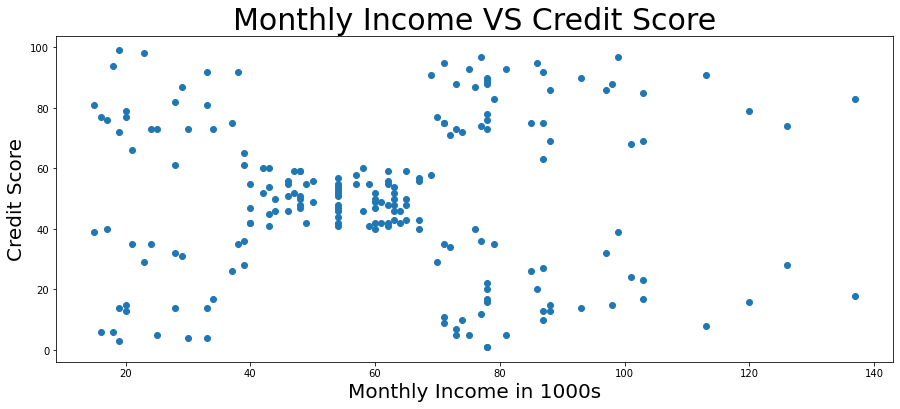

In [8]:
#Intitial view of the data
plt.figure(figsize=(15,6))
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Monthly Income in 1000s',fontsize=20)
plt.ylabel('Credit Score',fontsize=20)
plt.title('Monthly Income VS Credit Score',fontsize=30)

__________________________________________________________________________

# ELBOW METHOD- Optimal Clusters

Within Cluster Sum Of Squares(wcss)

wcss = SUMMATION euclidean distance of(Pi,C1)^2 + SUMMATION euclidean distance of (Pi,C2)^2

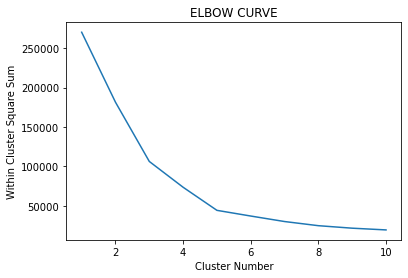

In [11]:
#Finding the optimum clusters using the ELBOW curve
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmean = KMeans(n_clusters=i, random_state=0)
    
    #n_clusters = The number of clusters to form as well as the number of centroids to generate.
    
    #init = methodfor initialisation, defaults to 'k-means++'. It selects initial cluster centre for 
    # k-mean clustering in a smart way to speed up convergence
    
    # n_init =defualt: 10, number of times the k-means algorithm will be run with different centroid seed
    
    #max_iter: default:300 , Maximum number of  iterations of the k-means algorithm for a single run to find the final cluster
    
    kmean.fit(X)
    wcss.append(kmean.inertia_)

plt.plot(range(1,11),wcss)
plt.title("ELBOW CURVE")
plt.xlabel("Cluster Number")
plt.ylabel("Within Cluster Square Sum")
plt.show()

In [12]:
#Fitting the model
#Elbow curve gives the optimal number of clusters i.e at Cluster Number = 5
kmean = KMeans(n_clusters=5,random_state=0)
y_kmean_clustering = kmean.fit_predict(X)

In [15]:
y_kmean_clustering
#there are 5 clusters so value of Y_kmean_clustering ranges from 0 to 4

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

Text(0.5, 1.0, 'Month Income VS Credit Score')

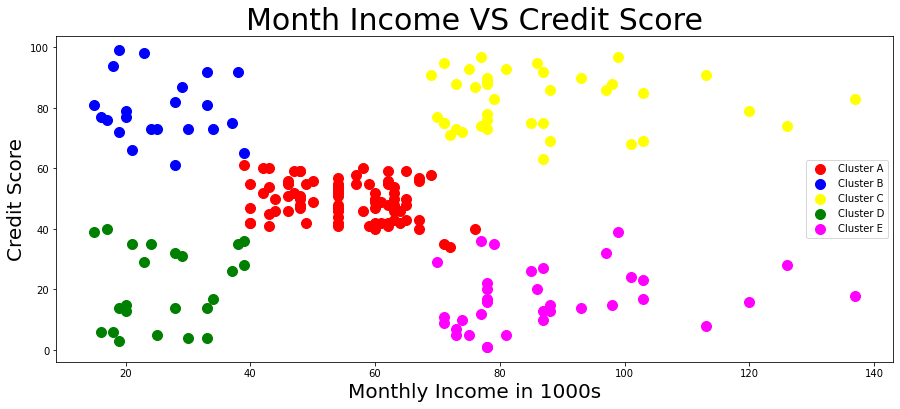

In [19]:
#Visualizing results

plt.figure(figsize=(15,6))
plt.scatter(X[y_kmean_clustering==0,0],X[y_kmean_clustering==0,1],s=100,c='red',label='Cluster A')
plt.scatter(X[y_kmean_clustering==1,0],X[y_kmean_clustering==1,1],s=100,c='blue',label='Cluster B')
plt.scatter(X[y_kmean_clustering==2,0],X[y_kmean_clustering==2,1],s=100,c='yellow',label='Cluster C')
plt.scatter(X[y_kmean_clustering==3,0],X[y_kmean_clustering==3,1],s=100,c='green',label='Cluster D')
plt.scatter(X[y_kmean_clustering==4,0],X[y_kmean_clustering==4,1],s=100,c='magenta',label='Cluster E')

#plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=200,c='black',label='Centroid')
plt.legend()
plt.xlabel("Monthly Income in 1000s",fontsize=20)
plt.ylabel("Credit Score",fontsize=20)
plt.title("Month Income VS Credit Score",fontsize=30)

#Now the original graph which we have seen above is colored on the basis of Clusters
#there are total 5 clusters

#Cluster A (Red group) : HIGH INCOME and LOW CREDIT SCORE
#Cluster B(Blue Group) : MEDIUM INCOME AND MEDIUM CREDIT SCORE
#Cluster C(Yellow Group): HIGH INCOME AND HIGH CREDIT SCORE
#Cluster D(Green Group): LOW INCOME AND HIGH CREDIT SCORE
#Cluster E(Magenta Group): LOW INCOME AND LOW CREDIT SCORE
 
#On basis of the above clusters we can segment different customers(people) and target them.